In [3]:
import pandas as pd
import numpy as np
import requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
job_data = pd.DataFrame(data)

In [4]:
job_data.columns  

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')

In [5]:
print(job_data)

                timestamp               company                level  \
0       6/7/2017 11:33:27                Oracle                   L3   
1      6/10/2017 17:11:29                  eBay                 SE 2   
2      6/11/2017 14:53:57                Amazon                   L7   
3      6/14/2017 21:22:25             Microsoft                   64   
4      6/16/2017 10:44:01                Amazon                   L5   
...                   ...                   ...                  ...   
62637   8/17/2021 8:16:36                Amazon                   L6   
62638   8/17/2021 8:22:17  Fidelity Investments                   L3   
62639   8/17/2021 8:24:56                 Cisco              Grade 8   
62640   8/17/2021 8:26:21                  HSBC                 GCB5   
62641   8/17/2021 8:28:57                 Adobe  Software Engineer 5   

                              title totalyearlycompensation  \
0                   Product Manager                     186   
1        

# New Section

**Clean the data**

In [9]:
import json

# Specify the path to your JSON file
json_file_path = 'salaryData.json'
output_json_file_path = 'cleanSalaryData.json'

# Read the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Filter the data based on 'gender' column and non-zero 'base salary'
filtered_data = []
for entry in data:
    if entry['gender'] in ['Male', 'Female'] and entry['basesalary'] != '0':
        # Replace base salary with amount/1000 if greater than 999
        if float(entry['basesalary']) > 999:
            entry['basesalary'] = str(float(entry['basesalary']) / 1000)
        filtered_data.append(entry)

# Write the filtered data to a new JSON file
with open(output_json_file_path, 'w') as file:
    json.dump(filtered_data, file)

print("Filtered data saved to", output_json_file_path)


Filtered data saved to cleanSalaryData.json


In [10]:
new_json_file = 'cleanSalaryData.json'

# Read the JSON file
with open(new_json_file, 'r') as file:
    dataClean = json.load(file)

# Get the number of data entries
num_entries = len(dataClean)
print(num_entries)

41738


In [11]:
print(pd.DataFrame(dataClean))

                timestamp                company                level  \
0      4/12/2018 16:15:32             GE Digital               Senior   
1      4/12/2018 23:19:33                 Amazon                   L5   
2       4/13/2018 6:32:17                   Uber                   L5   
3      4/13/2018 16:28:03              Microsoft                   61   
4      4/14/2018 13:05:22              Microsoft                   60   
...                   ...                    ...                  ...   
41733   8/17/2021 7:50:25  Raytheon Technologies                   P2   
41734   8/17/2021 8:16:36                 Amazon                   L6   
41735   8/17/2021 8:22:17   Fidelity Investments                   L3   
41736   8/17/2021 8:24:56                  Cisco              Grade 8   
41737   8/17/2021 8:28:57                  Adobe  Software Engineer 5   

                   title totalyearlycompensation           location  \
0      Software Engineer                     132    

** Read the new data file **

**Split the data in 3 array**

In [12]:
# Create arrays for each company
amazon_data = []
microsoft_data = []
google_data = []

# Filter and append data for each company
for entry in dataClean:
    company = entry['company']
    if company == 'Amazon':
        amazon_data.append(entry)
    elif company == 'Microsoft':
        microsoft_data.append(entry)
    elif company == 'Google':
        google_data.append(entry)

# Print the lengths of the arrays (optional)
print("Amazon Data Length:", len(amazon_data))
print("Microsoft Data Length:", len(microsoft_data))
print("Google Data Length:", len(google_data))

Amazon Data Length: 5277
Microsoft Data Length: 3497
Google Data Length: 2861


In [13]:
print(amazon_data)

[{'timestamp': '4/12/2018 23:19:33', 'company': 'Amazon', 'level': 'L5', 'title': 'Software Engineer', 'totalyearlycompensation': '180', 'location': 'Seattle, WA', 'yearsofexperience': '13', 'yearsatcompany': '1', 'tag': '', 'basesalary': '163', 'stockgrantvalue': '17', 'bonus': '0', 'gender': 'Male', 'otherdetails': 'whuesh physauebs', 'cityid': '11527', 'dmaid': '819', 'rowNumber': 480}, {'timestamp': '4/16/2018 13:31:30', 'company': 'Amazon', 'level': '7', 'title': 'Product Manager', 'totalyearlycompensation': '374882', 'location': 'Seattle, WA', 'yearsofexperience': '6', 'yearsatcompany': '15', 'tag': '', 'basesalary': '136.784', 'stockgrantvalue': '238098', 'bonus': '0', 'gender': 'Male', 'otherdetails': '', 'cityid': '11527', 'dmaid': '819', 'rowNumber': 494}, {'timestamp': '4/17/2018 11:53:13', 'company': 'Amazon', 'level': 'L6', 'title': 'Product Manager', 'totalyearlycompensation': '200593', 'location': 'Seattle, WA', 'yearsofexperience': '3', 'yearsatcompany': '1', 'tag': '',

In [14]:
# Create dictionaries to store counts for each company
amazon_counts = {'Male': 0, 'Female': 0}
microsoft_counts = {'Male': 0, 'Female': 0}
google_counts = {'Male': 0, 'Female': 0}

# Count the data for each company and gender
for entry in dataClean:
    company = entry['company']
    gender = entry.get('gender', '')  # Use .get() to handle missing/empty gender
    if company == 'Amazon' and gender in ['Male', 'Female']:
        amazon_counts[gender] += 1
    elif company == 'Microsoft' and gender in ['Male', 'Female']:
        microsoft_counts[gender] += 1
    elif company == 'Google' and gender in ['Male', 'Female']:
        google_counts[gender] += 1

# Print the counts for each company and gender
print("Amazon Data:")
print("Male:", amazon_counts['Male'])
print("Female:", amazon_counts['Female'])
print()
print("Microsoft Data:")
print("Male:", microsoft_counts['Male'])
print("Female:", microsoft_counts['Female'])
print()
print("Google Data:")
print("Male:", google_counts['Male'])
print("Female:", google_counts['Female'])

Amazon Data:
Male: 4502
Female: 775

Microsoft Data:
Male: 2872
Female: 625

Google Data:
Male: 2382
Female: 479


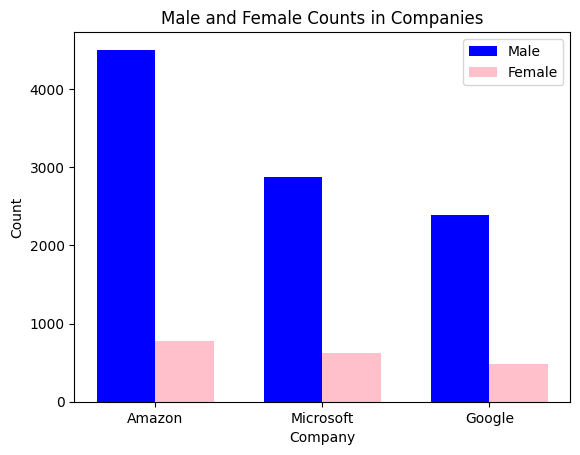

In [16]:
import matplotlib.pyplot as plt

# Data
amazon_data = {'Male': 4502, 'Female': 775}
microsoft_data = {'Male': 2872, 'Female': 625}
google_data = {'Male': 2382, 'Female': 479}

# Create lists for the x-axis labels and the corresponding data values
companies = ['Amazon', 'Microsoft', 'Google']
male_counts = [amazon_data['Male'], microsoft_data['Male'], google_data['Male']]
female_counts = [amazon_data['Female'], microsoft_data['Female'], google_data['Female']]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(companies))
r2 = [x + bar_width for x in r1]

# Create the bar graph
plt.bar(r1, male_counts, color='blue', width=bar_width, label='Male')
plt.bar(r2, female_counts, color='pink', width=bar_width, label='Female')

# Add labels, title, and legend
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Male and Female Counts in Companies')
plt.xticks([r + bar_width/2 for r in r1], companies)
plt.legend()

# Display the plot
plt.show()


In [ ]:
# Create a dictionary to store positions and gender counts for each company
company_positions = {
    "Amazon": {},
    "Microsoft": {},
    "Google": {}
}

# Iterate through the data and populate the dictionary
for entry in dataClean:
    company = entry['company']
    title = entry['title']
    gender = entry['gender']
    
    if company in company_positions and gender in ['Male', 'Female']:
        if title not in company_positions[company]:
            company_positions[company][title] = {'Male': 0, 'Female': 0}
        
        company_positions[company][title][gender] += 1

# Print the positions and gender counts for each company
for company, positions in company_positions.items():
    print(f"Company: {company}")
    for position, gender_counts in positions.items():
        print("Position:", position)
        print("Male:", gender_counts['Male'])
        print("Female:", gender_counts['Female'])
        print()
    print("----------------------------------")

Company: Amazon
Position: Software Engineer
Male: 3056
Female: 334

Position: Product Manager
Male: 410
Female: 152

Position: Software Engineering Manager
Male: 352
Female: 37

Position: Data Scientist
Male: 118
Female: 31

Position: Solution Architect
Male: 177
Female: 13

Position: Product Designer
Male: 60
Female: 46

Position: Sales
Male: 24
Female: 10

Position: Hardware Engineer
Male: 54
Female: 7

Position: Human Resources
Male: 13
Female: 20

Position: Business Analyst
Male: 41
Female: 23

Position: Marketing
Male: 24
Female: 26

Position: Technical Program Manager
Male: 130
Female: 38

Position: Recruiter
Male: 25
Female: 35

Position: Management Consultant
Male: 8
Female: 1

Position: Mechanical Engineer
Male: 10
Female: 2

----------------------------------
Company: Microsoft
Position: Software Engineer
Male: 1985
Female: 325

Position: Product Manager
Male: 265
Female: 110

Position: Software Engineering Manager
Male: 171
Female: 20

Position: Solution Architect
Male: 70
F

**comparison between software engineer and software engineer manager**

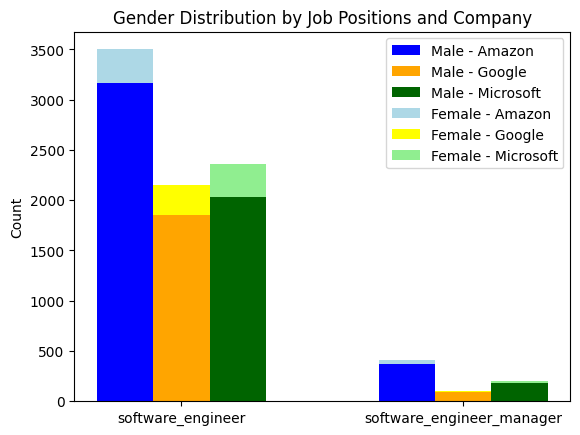

In [ ]:
import numpy as np

# Data for Amazon
amazon_male = [3162, 371]
amazon_female = [341, 41]
amazon_positions = ['software_engineer', 'software_engineer_manager']

# Data for Google
google_male = [1850, 86]
google_female = [303, 13]
google_positions = ['software_engineer', 'software_engineer_manager']

# Data for Microsoft
microsoft_male = [2032, 180]
microsoft_female = [330, 20]
microsoft_positions = ['software_engineer', 'software_engineer_manager']

# Define positions for the bars
positions = np.arange(len(amazon_positions))

# Set width for each bar
width = 0.2

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the male data for each company
ax.bar(positions - width, amazon_male, width, label='Male - Amazon', color='blue')
ax.bar(positions, google_male, width, label='Male - Google', color='orange')
ax.bar(positions + width, microsoft_male, width, label='Male - Microsoft', color='darkgreen')

# Plot the female data for each company
ax.bar(positions - width, amazon_female, width, bottom=amazon_male, label='Female - Amazon', color='lightblue')
ax.bar(positions, google_female, width, bottom=google_male, label='Female - Google', color='yellow')
ax.bar(positions + width, microsoft_female, width, bottom=microsoft_male, label='Female - Microsoft', color='lightgreen')

# Set x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(amazon_positions)

# Set y-axis label
ax.set_ylabel('Count')

# Set title
ax.set_title('Gender Distribution by Job Positions and Company')

# Add legend
ax.legend()

# Show the plot
plt.show()


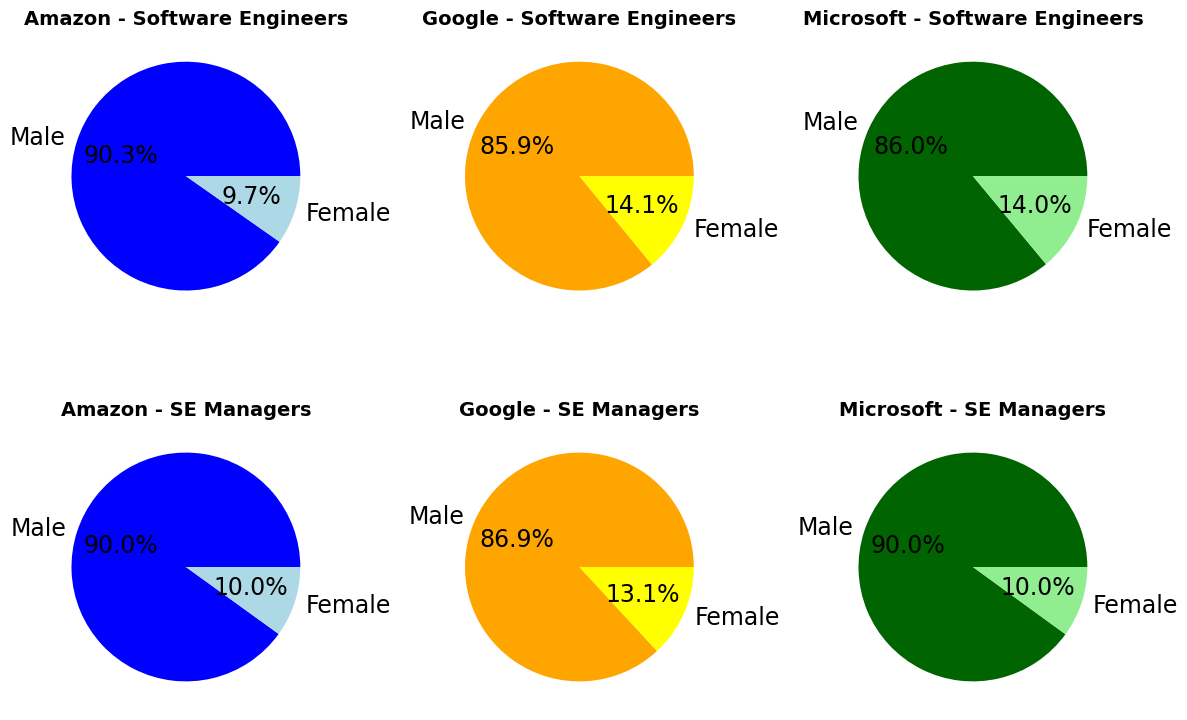

In [ ]:
import matplotlib.pyplot as plt

# Data for Amazon
amazon_engineer_counts = [3162, 341]
amazon_manager_counts = [371, 41]

# Data for Google
google_engineer_counts = [1850, 303]
google_manager_counts = [86, 13]

# Data for Microsoft
microsoft_engineer_counts = [2032, 330]
microsoft_manager_counts = [180, 20]

# Labels for the pie charts
labels = ['Male', 'Female']

# Create the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Create the pie charts for software engineers
axes[0, 0].pie(amazon_engineer_counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'lightblue'],textprops={'fontsize': 17})
axes[0, 0].set_title('Amazon - Software Engineers', fontdict={'fontsize': 14, 'fontweight': 'bold'})

axes[0, 1].pie(google_engineer_counts, labels=labels, autopct='%1.1f%%', colors=['orange', 'yellow'],textprops={'fontsize': 17})
axes[0, 1].set_title('Google - Software Engineers', fontdict={'fontsize': 14, 'fontweight': 'bold'})

axes[0, 2].pie(microsoft_engineer_counts, labels=labels, autopct='%1.1f%%', colors=['darkgreen', 'lightgreen'],textprops={'fontsize': 17})
axes[0, 2].set_title('Microsoft - Software Engineers', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Create the pie charts for software engineer managers
axes[1, 0].pie(amazon_manager_counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'lightblue'],textprops={'fontsize': 17})
axes[1, 0].set_title('Amazon - SE Managers', fontdict={'fontsize': 14, 'fontweight': 'bold'})

axes[1, 1].pie(google_manager_counts, labels=labels, autopct='%1.1f%%', colors=['orange', 'yellow'],textprops={'fontsize': 17})
axes[1, 1].set_title('Google - SE Managers', fontdict={'fontsize': 14, 'fontweight': 'bold'})

axes[1, 2].pie(microsoft_manager_counts, labels=labels, autopct='%1.1f%%', colors=['darkgreen', 'lightgreen'],textprops={'fontsize': 17})
axes[1, 2].set_title('Microsoft - SE Managers', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()


In [ ]:
# Create dictionaries to store the counts of women per company per year
google_women_counts = {}
amazon_women_counts = {}
microsoft_women_counts = {}

# Iterate over the data
for entry in dataClean:
    company = entry['company']
    timestamp = entry['timestamp']
    gender = entry['gender']
    years_at_company = int(entry['yearsatcompany'])

    # Extract the year from the timestamp
    year = int(timestamp.split('/')[2].split(' ')[0])

    # Adjust the start year based on years_at_company
    start_year = year - years_at_company + 1

    # Increment the count for women in the corresponding company and year
    if company == 'Google':
        for y in range(start_year, year + 1):
            if 2017 <= y <= 2020:
                google_women_counts[str(y)] = google_women_counts.get(str(y), 0) + (gender == 'Female')
    elif company == 'Amazon':
        for y in range(start_year, year + 1):
            if 2017 <= y <= 2020:
                amazon_women_counts[str(y)] = amazon_women_counts.get(str(y), 0) + (gender == 'Female')
    elif company == 'Microsoft':
        for y in range(start_year, year + 1):
            if 2017 <= y <= 2020:
                microsoft_women_counts[str(y)] = microsoft_women_counts.get(str(y), 0) + (gender == 'Female')

# Print the counts of women for each company per year
print("Google - Women Counts:")
for year, count in google_women_counts.items():
    print(f"Year {year}: {count} women")

print("\nAmazon - Women Counts:")
for year, count in amazon_women_counts.items():
    print(f"Year {year}: {count} women")

print("\nMicrosoft - Women Counts:")
for year, count in microsoft_women_counts.items():
    print(f"Year {year}: {count} women")


Google - Women Counts:
Year 2017: 100 women
Year 2018: 142 women
Year 2019: 196 women
Year 2020: 208 women

Amazon - Women Counts:
Year 2017: 173 women
Year 2018: 259 women
Year 2019: 361 women
Year 2020: 359 women

Microsoft - Women Counts:
Year 2017: 151 women
Year 2018: 206 women
Year 2019: 266 women
Year 2020: 279 women


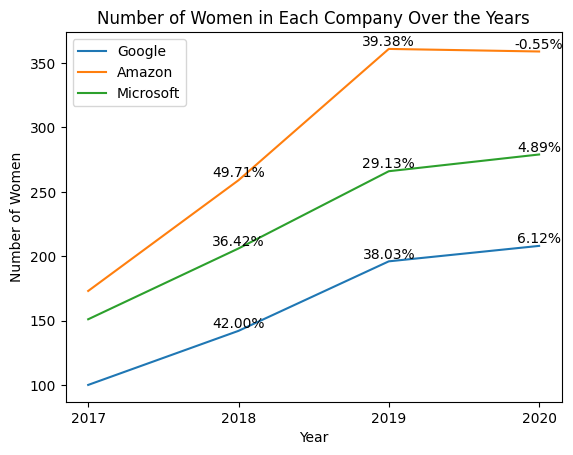

In [ ]:
# Create dictionaries to store the counts of females per year for each company
google_female_counts = {}
amazon_female_counts = {}
microsoft_female_counts = {}

# Iterate over the data
for entry in dataClean:
    company = entry['company']
    timestamp = entry['timestamp']
    gender = entry['gender']
    years_at_company = int(entry['yearsatcompany'])

    # Extract the year from the timestamp
    year = int(timestamp.split('/')[2].split(' ')[0])

    # Adjust the start year based on years_at_company
    start_year = year - years_at_company + 1

    # Increment the count for females in the corresponding company and year
    if company == 'Google':
        for y in range(start_year, year + 1):
            google_female_counts[str(y)] = google_female_counts.get(str(y), 0) + (gender == 'Female')
    elif company == 'Amazon':
        for y in range(start_year, year + 1):
            amazon_female_counts[str(y)] = amazon_female_counts.get(str(y), 0) + (gender == 'Female')
    elif company == 'Microsoft':
        for y in range(start_year, year + 1):
            microsoft_female_counts[str(y)] = microsoft_female_counts.get(str(y), 0) + (gender == 'Female')

# Create lists for the years and female counts for each company
years = ['2017', '2018', '2019', '2020']
google_female = [google_female_counts.get(year, 0) for year in years]
amazon_female = [amazon_female_counts.get(year, 0) for year in years]
microsoft_female = [microsoft_female_counts.get(year, 0) for year in years]

# Calculate the percentage increase for each year (excluding 2017)
google_percentage_increase = [0] + [((google_female[i] - google_female[i-1]) / google_female[i-1]) * 100
                                   for i in range(1, len(google_female))]
amazon_percentage_increase = [0] + [((amazon_female[i] - amazon_female[i-1]) / amazon_female[i-1]) * 100
                                    for i in range(1, len(amazon_female))]
microsoft_percentage_increase = [0] + [((microsoft_female[i] - microsoft_female[i-1]) / microsoft_female[i-1]) * 100
                                        for i in range(1, len(microsoft_female))]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the lines for each company with percentage labels
ax.plot(years, google_female, label='Google')
ax.plot(years, amazon_female, label='Amazon')
ax.plot(years, microsoft_female, label='Microsoft')

for i, (x, y) in enumerate(zip(years[1:], google_female[1:])):
    ax.text(x, y, f'{google_percentage_increase[i+1]:.2f}%', ha='center', va='bottom')
for i, (x, y) in enumerate(zip(years[1:], amazon_female[1:])):
    ax.text(x, y, f'{amazon_percentage_increase[i+1]:.2f}%', ha='center', va='bottom')
for i, (x, y) in enumerate(zip(years[1:], microsoft_female[1:])):
    ax.text(x, y, f'{microsoft_percentage_increase[i+1]:.2f}%', ha='center', va='bottom')

# Set x-axis label
ax.set_xlabel('Year')

# Set y-axis label
ax.set_ylabel('Number of Women')

# Set title
ax.set_title('Number of Women in Each Company Over the Years')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:

# Filter the data for software engineer managers
filtered_data = [entry for entry in data if entry['title'] == 'Software Engineering Manager']

# Calculate average years at company for males and females
male_years = []
female_years = []
for entry in filtered_data:
    if entry['gender'] == 'Male':
        male_years.append(int(entry['yearsatcompany']))
    elif entry['gender'] == 'Female':
        female_years.append(int(entry['yearsatcompany']))

# Calculate the average number of years at company for males and females
average_male_years = sum(male_years) / len(male_years) if len(male_years) > 0 else 0
average_female_years = sum(female_years) / len(female_years) if len(female_years) > 0 else 0

# Print the results
print("Average years at company for male software engineer managers:", average_male_years)
print("Average years at company for female software engineer managers:", average_female_years)


Average years at company for male software engineer managers: 5.026251823043267
Average years at company for female software engineer managers: 4.782805429864253


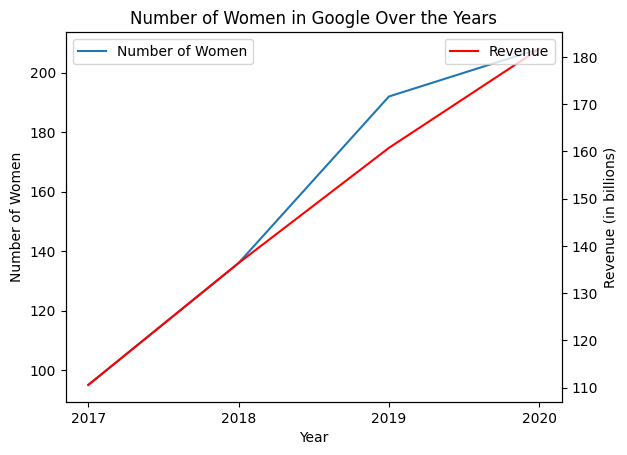

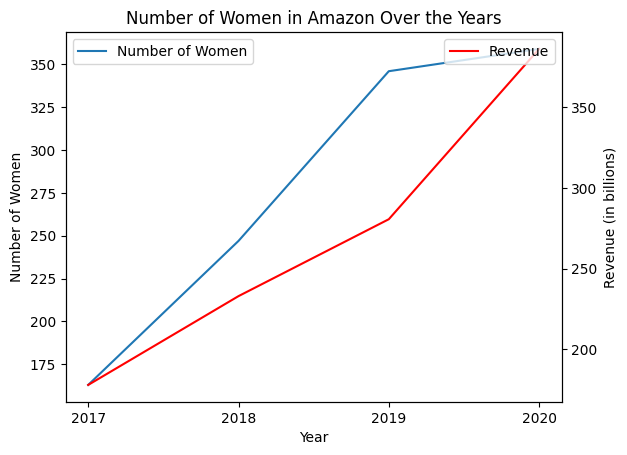

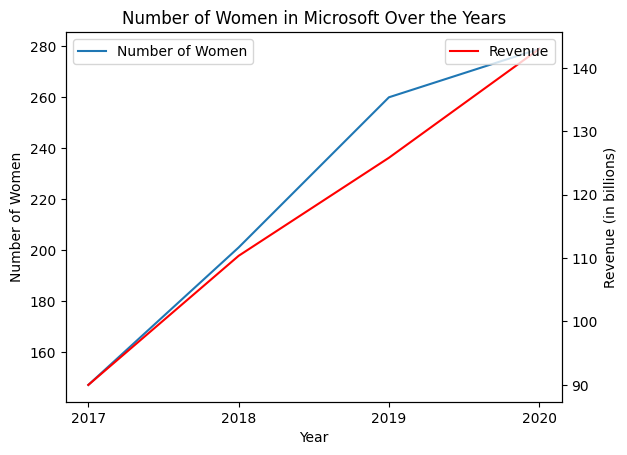

In [ ]:
# Create dictionaries to store the counts of females per year for each company
google_female_counts = {}
amazon_female_counts = {}
microsoft_female_counts = {}

# Iterate over the data
for entry in dataClean:
    company = entry['company']
    timestamp = entry['timestamp']
    gender = entry['gender']
    years_at_company = int(entry['yearsatcompany'])

    # Extract the year from the timestamp
    year = int(timestamp.split('/')[2].split(' ')[0])

    # Adjust the start year based on years_at_company
    start_year = year - years_at_company + 1

    # Increment the count for females in the corresponding company and year
    if company == 'Google':
        for y in range(start_year, year + 1):
            google_female_counts[str(y)] = google_female_counts.get(str(y), 0) + (gender == 'Female')
    elif company == 'Amazon':
        for y in range(start_year, year + 1):
            amazon_female_counts[str(y)] = amazon_female_counts.get(str(y), 0) + (gender == 'Female')
    elif company == 'Microsoft':
        for y in range(start_year, year + 1):
            microsoft_female_counts[str(y)] = microsoft_female_counts.get(str(y), 0) + (gender == 'Female')

# Create lists for the years and female counts for each company
years = ['2017', '2018', '2019', '2020']
google_female = [google_female_counts.get(year, 0) for year in years]
amazon_female = [amazon_female_counts.get(year, 0) for year in years]
microsoft_female = [microsoft_female_counts.get(year, 0) for year in years]

# Create the figure and axes for the first graph (Google)
fig, ax1 = plt.subplots()

# Plot the line for the number of females in Google
ax1.plot(years, google_female, label='Number of Women')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Women')

# Set title for the first graph
ax1.set_title('Number of Women in Google Over the Years')

# Add legend for the first graph
ax1.legend(loc='upper left')

# Create the first graph (Google)
ax2 = ax1.twinx()

# Add the revenue data for Google
google_revenue = [110.55, 136.36 , 160.74 , 181.69]
ax2.plot(years, google_revenue, label='Revenue', color='red')
ax2.set_ylabel('Revenue (in billions)')

# Add legend for the second graph
ax2.legend(loc='upper right')

# Show the first graph
plt.show()

# Create the figure and axes for the second graph (Amazon)
fig, ax1 = plt.subplots()

# Plot the line for the number of females in Amazon
ax1.plot(years, amazon_female, label='Number of Women')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Women')

# Set title for the second graph
ax1.set_title('Number of Women in Amazon Over the Years')

# Add legend for the second graph
ax1.legend(loc='upper left')

# Create the second graph (Amazon)
ax2 = ax1.twinx()
amazon_revenue = [177.86 , 232.88 , 280.53 , 386.06]

# Add the revenue data for Amazon
ax2.plot(years, amazon_revenue, label='Revenue', color='red')
ax2.set_ylabel('Revenue (in billions)')

# Add legend for the second graph
ax2.legend(loc='upper right')

# Show the second graph
plt.show()

# Create the figure and axes for the third graph (Microsoft)
fig, ax1 = plt.subplots()

# Plot the line for the number of females in Microsoft
ax1.plot(years, microsoft_female, label='Number of Women')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Women')

# Set title for the third graph
ax1.set_title('Number of Women in Microsoft Over the Years')

# Add legend for the third graph
ax1.legend(loc='upper left')

# Create the third graph (Microsoft)
ax2 = ax1.twinx()

# Add the revenue data for Microsoft
microsoft_revenue = [89.98, 110.36, 125.84, 143.02]
ax2.plot(years, microsoft_revenue, label='Revenue', color='red')
ax2.set_ylabel('Revenue (in billions)')

# Add legend for the third graph
ax2.legend(loc='upper right')

# Show the third graph
plt.show()


# amazon/google/Microsoft: min	max	mean	std

In [ ]:
import statistics
# Filter the data based on 'Title' column and 'gender' column
filtered_data = [entry for entry in dataClean if entry['title'] == 'Software Engineer' and entry['gender'] == 'Male']

# Extract the base salary values
base_salaries = [float(entry['basesalary']) for entry in filtered_data]

# Calculate the average base salary
average_salary = statistics.mean(base_salaries)

# Calculate the maximum base salary
max_salary = max(base_salaries)

# Calculate the minimum base salary
min_salary = min(base_salaries)

# Calculate the standard deviation of the base salary
std_deviation = statistics.stdev(base_salaries)

# Print the results
print("-------------Male Statistics---------------")
print("Average Base Salary: $", average_salary, "USD")
print("Maximum Base Salary: $", max_salary, "USD")
print("Minimum Base Salary: $", min_salary, "USD")
print("Standard Deviation of Base Salary: $", std_deviation, "USD")

# Filter the data based on 'Title' column and 'gender' column
filtered_data_women = [entry for entry in dataClean if entry['title'] == 'Software Engineer' and entry['gender'] == 'Female']

# Extract the base salary values
base_salaries_women = [float(entry['basesalary']) for entry in filtered_data_women]

# Calculate the average base salary
average_salary_women = statistics.mean(base_salaries_women)

# Calculate the maximum base salary
max_salary_women = max(base_salaries_women)

# Calculate the minimum base salary
min_salary_women = min(base_salaries_women)

# Calculate the standard deviation of the base salary
std_deviation_women = statistics.stdev(base_salaries_women)

# Print the results
print("-------------Women Statistics---------------")
print("Average Base Salary: $", average_salary_women, "USD")
print("Maximum Base Salary: $", max_salary_women, "USD")
print("Minimum Base Salary: $", min_salary_women, "USD")
print("Standard Deviation of Base Salary: $", std_deviation_women, "USD")

# Filter the data based on 'Title' column and 'gender' column
filtered_data_men_SEM = [entry for entry in dataClean if entry['title'] == 'Software Engineering Manager' and entry['gender'] == 'Male']

# Extract the base salary values
base_salaries_SEM = [float(entry['basesalary']) for entry in filtered_data_men_SEM]

# Calculate the average base salary
average_salary_SEM = statistics.mean(base_salaries_SEM)

# Calculate the maximum base salary
max_salary_SEM = max(base_salaries_SEM)

# Calculate the minimum base salary
min_salary_SEM = min(base_salaries_SEM)

# Calculate the standard deviation of the base salary
std_deviation_SEM = statistics.stdev(base_salaries_SEM)

# Print the results
print("-------------Male Statistics SE Managers---------------")
print("Average Base Salary: $", average_salary_SEM, "USD")
print("Maximum Base Salary: $", max_salary_SEM, "USD")
print("Minimum Base Salary: $", min_salary_SEM, "USD")
print("Standard Deviation of Base Salary: $", std_deviation_SEM, "USD")

# Filter the data based on 'Title' column and 'gender' column
filtered_data_women_SEM = [entry for entry in dataClean if entry['title'] == 'Software Engineering Manager' and entry['gender'] == 'Female']

# Extract the base salary values
base_salaries_women_SEM = [float(entry['basesalary']) for entry in filtered_data_women_SEM]

# Calculate the average base salary
average_salary_women_SEM = statistics.mean(base_salaries_women_SEM)

# Calculate the maximum base salary
max_salary_women_SEM = max(base_salaries_women_SEM)

# Calculate the minimum base salary
min_salary_women_SEM = min(base_salaries_women_SEM)

# Calculate the standard deviation of the base salary
std_deviation_women_SEM = statistics.stdev(base_salaries_women_SEM)

# Print the results
print("-------------Women Statistics SE Managers---------------")
print("Average Base Salary: $", average_salary_women_SEM, "USD")
print("Maximum Base Salary: $", max_salary_women_SEM, "USD")
print("Minimum Base Salary: $", min_salary_women_SEM, "USD")
print("Standard Deviation of Base Salary: $", std_deviation_women_SEM, "USD")

-------------Male Statistics---------------
Average Base Salary: $ 134.19281234467306 USD
Maximum Base Salary: $ 2057.772 USD
Minimum Base Salary: $ 1.23 USD
Standard Deviation of Base Salary: $ 69.46129075620519 USD
-------------Women Statistics---------------
Average Base Salary: $ 134.63673930291867 USD
Maximum Base Salary: $ 727.0 USD
Minimum Base Salary: $ 1.017 USD
Standard Deviation of Base Salary: $ 64.10349362481794 USD
-------------Male Statistics SE Managers---------------
Average Base Salary: $ 179.6130985844287 USD
Maximum Base Salary: $ 894.0 USD
Minimum Base Salary: $ 1.021 USD
Standard Deviation of Base Salary: $ 84.51989692594383 USD
-------------Women Statistics SE Managers---------------
Average Base Salary: $ 188.06869811320755 USD
Maximum Base Salary: $ 528.0 USD
Minimum Base Salary: $ 56.0 USD
Standard Deviation of Base Salary: $ 79.60305162238214 USD


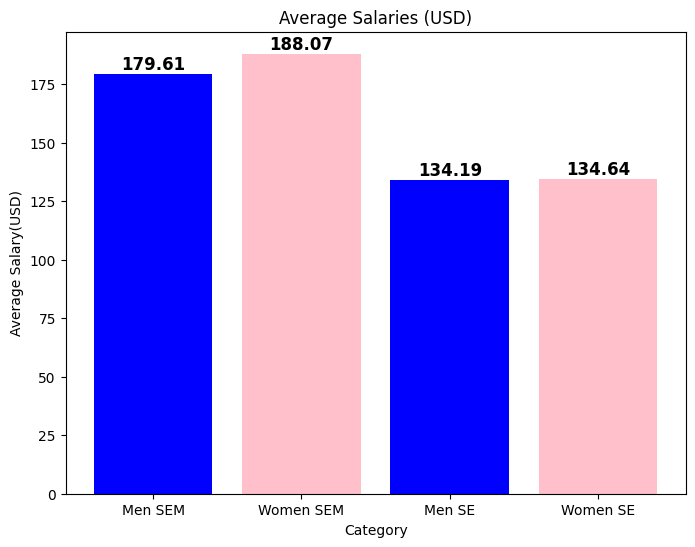

In [ ]:
# Create a list of x-axis labels
labels = ['Men SEM', 'Women SEM', 'Men SE', 'Women SE']

# Create a list of average salary values
values = [average_salary_SEM, average_salary_women_SEM, average_salary, average_salary_women]

# Specify custom colors for the bars
colors = ['blue', 'pink', 'blue', 'pink']

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart with custom colors
bars = plt.bar(labels, values, color=colors)

# Set the title and labels
plt.title('Average Salaries (USD)')
plt.xlabel('Category')
plt.ylabel('Average Salary(USD)')

# Add the numbers to the middle of each bar
for bar in bars:
    height = bar.get_height()
    rounded_height = round(height, 2)
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(rounded_height),
             ha='center', va='bottom', fontweight='bold', fontsize=12)


# Display the plot
plt.show()


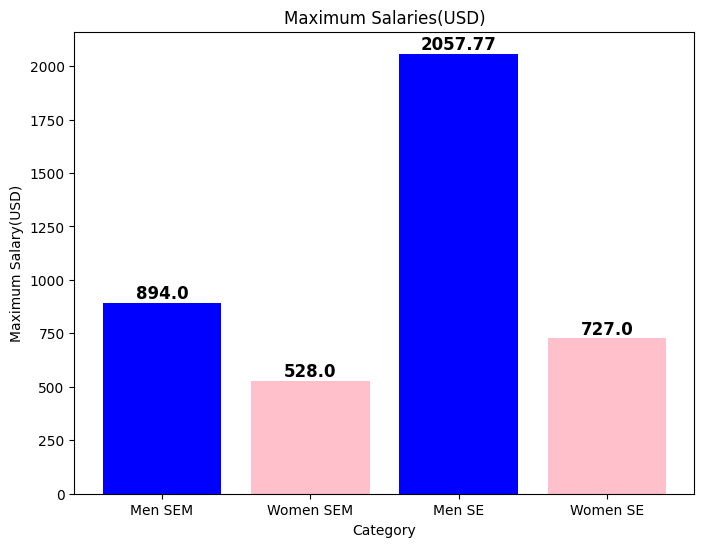

In [ ]:
# Create a list of x-axis labels
labels = ['Men SEM', 'Women SEM', 'Men SE', 'Women SE']

# Create a list of maximum salary values
values = [max_salary_SEM, max_salary_women_SEM, max_salary, max_salary_women]

# Specify custom colors for the bars
colors = ['blue', 'pink', 'blue', 'pink']

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart with custom colors
bars = plt.bar(labels, values, color=colors)

# Set the title and labels
plt.title('Maximum Salaries(USD)')
plt.xlabel('Category')
plt.ylabel('Maximum Salary(USD)')

# Add the rounded numbers to the middle of each bar
for bar in bars:
    height = bar.get_height()
    rounded_height = round(height, 2)
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(rounded_height),
             ha='center', va='bottom', fontweight='bold', fontsize=12)

# Display the plot
plt.show()
